In [1]:
%config InlineBackend.rc = {"figure.dpi": 72, "figure.figsize": (6.0, 4.0)}
%matplotlib inline

import abtem
import ase
import matplotlib.pyplot as plt
import numpy as np
from ase.io import read
from ase.io import write
from ase.visualize import view
from ase import Atoms


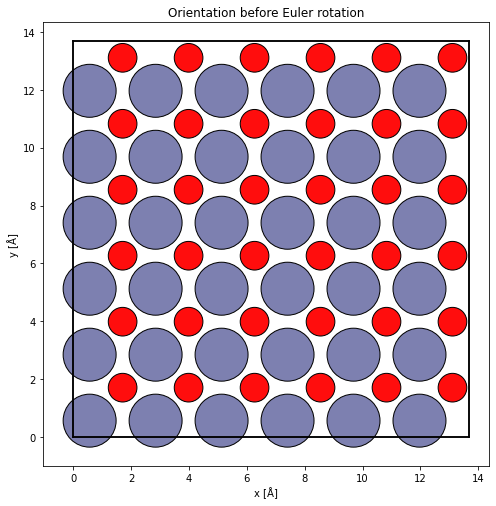

In [2]:
atoms = read( r"C:\Users\Joshu\OneDrive - Cardiff University\Desktop\cropped\ZnO(cubic F4̅3m).cif")
#view (atoms)

fig, ax1 = abtem.show_atoms(atoms,figsize=(8, 8), title="Orientation before Euler rotation")



In [3]:
# Define the rotation matrices for each axis
def rotation_matrix_z(phi):
    return np.array([
        [np.cos(phi), -np.sin(phi), 0],
        [np.sin(phi), np.cos(phi), 0],
        [0, 0, 1]
    ])

def rotation_matrix_x(theta):
    return np.array([
        [1, 0, 0],
        [0, np.cos(theta), -np.sin(theta)],
        [0, np.sin(theta), np.cos(theta)]
    ])

def rotation_matrix_z_2(psi):
    return np.array([
        [np.cos(psi), -np.sin(psi), 0],
        [np.sin(psi), np.cos(psi), 0],
        [0, 0, 1]
    ])

# Function to apply rotation with angles phi, theta, psi
def rotate_structure(coords, phi, theta, psi):
    # Create the full rotation matrix: R = Rz(phi) * Rx(theta) * Rz(psi)
    R = rotation_matrix_z(phi) @ rotation_matrix_x(theta) @ rotation_matrix_z_2(psi)
    
    # Apply the rotation matrix to each coordinate
    rotated_coords = np.dot(coords, R.T)
    return rotated_coords

def rotate_model(atoms, phi, theta, psi):
    """
    Rotate the atomic model using Euler angles (phi, theta, psi).

    :param atoms: ASE Atoms object
    :param phi: Rotation around the first z-axis (degrees)
    :param theta: Rotation around the x-axis (degrees)
    :param psi: Rotation around the second z-axis (degrees)
    :return: Rotated ASE Atoms object
    """
    # Convert angles from degrees to radians
    phi = np.radians(phi)
    theta = np.radians(theta)
    psi = np.radians(psi)
    
    # Get the atomic coordinates
    coords = atoms.get_positions()
    
    # Apply the rotation to the coordinates
    rotated_coords = rotate_structure(coords, phi, theta, psi)
    
    # Set the rotated coordinates back to the atoms object
    atoms.set_positions(rotated_coords)
    
    return atoms

Enter phi (rotation around z-axis in degrees):  130
Enter theta (rotation around x-axis in degrees):  55
Enter psi (rotation around z-axis in degrees):  135


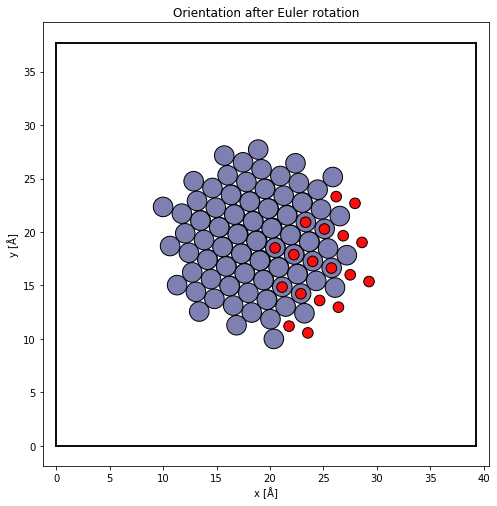

In [4]:
# Input Euler angles (phi, theta, psi)
phi = float(input("Enter phi (rotation around z-axis in degrees): "))
theta = float(input("Enter theta (rotation around x-axis in degrees): "))
psi = float(input("Enter psi (rotation around z-axis in degrees): "))

# Rotate the model using the input Euler angles
rotated_atoms = rotate_model(atoms, phi, theta, psi)

# Adjust the cell size if necessary (you can adjust it based on your model size)
cell_size = [13, 13, 13]  # Adjust based on your model size
rotated_atoms.set_cell(cell_size)

# Center the atoms and add vacuum if needed
rotated_atoms.center(vacuum=10)  # Adjust vacuum padding if needed
rotated_atoms.wrap()  # Ensure atoms remain within the unit cell

# Visualize the rotated structure
#view(rotated_atoms)
fig, ax1 = abtem.show_atoms(atoms,figsize=(8, 8), title="Orientation after Euler rotation")


In [7]:
output_file = "_111.cif"  # Change this to your preferred filename and format
write(output_file, rotated_atoms)
print(f"Rotated model saved as {output_file}")

Rotated model saved as _111.cif
